In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)

In [2]:
# Numerics Parameters
Lx, Ly = 17, 17
N = 256
Nx, Ny = N, N

dealias = 1
dtype = np.float64

# Bases
coords = d3.CartesianCoordinates('x', 'y')
dist = d3.Distributor(coords, dtype=dtype)
xbasis = d3.RealFourier(coords['x'], size=Nx, bounds=(-Lx/2, Lx/2), dealias=dealias)
ybasis = d3.RealFourier(coords['y'], size=Ny, bounds=(-Ly/2, Ly/2), dealias=dealias)

# Fields
q  = dist.Field(name='q' , bases=(xbasis,ybasis))

# Substitution
x, y = dist.local_grids(xbasis, ybasis)
kx = np.squeeze(dist.local_modes(xbasis))
ky = np.squeeze(dist.local_modes(ybasis))

In [3]:
# print(kx)
# print(xbasis.wavenumbers)

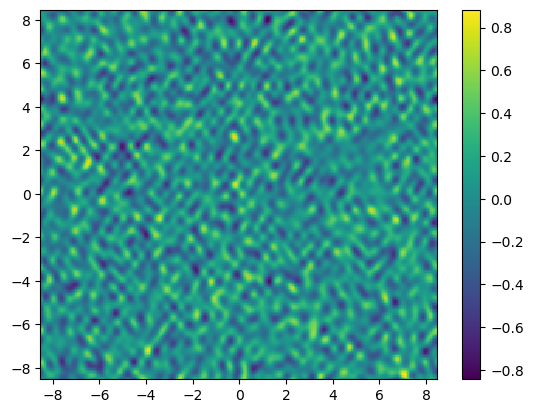

In [4]:
q.fill_random('g', distribution='normal', scale=1); q.low_pass_filter(shape=(50, 66))
# q['c'][0,2]=1
# q['g'] = np.exp(np.sin(2*np.pi*x)+np.cos(10*np.pi*y))
# q['g'] = np.sin(2*np.pi*x)+np.cos(10*np.pi*y)
# q['c'][0,0]=0

q.change_scales(1)
plt.pcolor(x.ravel(),y.ravel(),q['g'])
plt.colorbar()

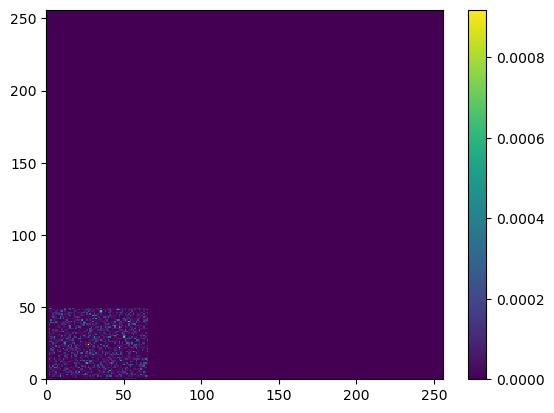

In [5]:
q_mag2d = q['c']*np.conj(q['c'])
plt.pcolor(q_mag2d)
plt.colorbar()

In [6]:
d3.Integrate(q*np.conj(q),('x','y')).evaluate()['g']/(Lx*Ly)

array([[0.04964697]])

In [7]:
import sys
# sys.path.append("../subroutines")
sys.path.append("subroutines")
from isospectrum import isospectrum

q_spec = isospectrum(q_mag2d)
print(q_spec.sum())

0.049646974878718456


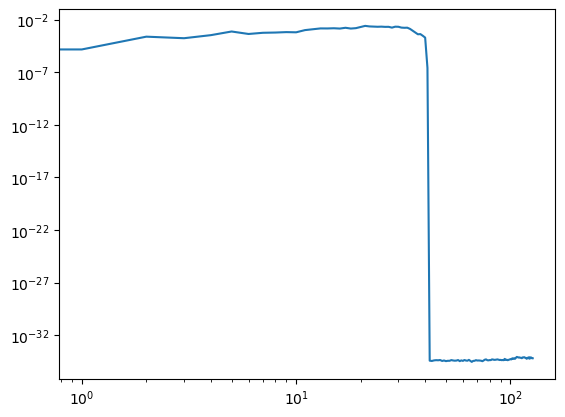

In [8]:
plt.loglog(q_spec)